<a href="https://colab.research.google.com/github/KatarinaNunes/Atividade_Disciplina/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(context='talk', style='whitegrid')

In [3]:
df = pd.read_excel('/Rifampicina_integrado_revisado.xlsx')

In [4]:
df_mut = df[~df["mut_clean"].str.contains("WT", na=False)].copy()


In [5]:
num_cols = [
    "melhor_energia",   # melhor binding affinity
    "media_energia",
    "desvio_energia",
    "media_le",
    "media_conf",
    "media_ic50",
    "n_poses",
    "ddG_kcal"
]

In [6]:
print(df_mut[num_cols].describe())


       melhor_energia  media_energia  desvio_energia   media_le  media_conf  \
count       39.000000      39.000000       39.000000  39.000000   39.000000   
mean        -6.893767      -6.218190        0.499198  -0.105393    0.798744   
std          0.168636       0.167902        0.101974   0.002846    0.030936   
min         -7.060231      -6.538727        0.240389  -0.110826    0.706000   
25%         -6.993231      -6.367935        0.451637  -0.107931    0.786500   
50%         -6.956217      -6.213626        0.507107  -0.105316    0.804000   
75%         -6.864230      -6.090382        0.568062  -0.103227    0.822000   
max         -6.420203      -5.911776        0.686288  -0.100200    0.838000   

       media_ic50    n_poses     ddG_kcal  
count   39.000000  39.000000    39.000000  
mean    39.130000   8.717949    89.688487  
std     10.127313   0.998650   460.245550  
min     18.050000   5.000000  -940.555000  
25%     32.450000   8.000000     4.605000  
50%     39.520000   9.00

#scatterplot

Text(0.5, 1.0, 'Rifampicina - melhor energia x IC50')

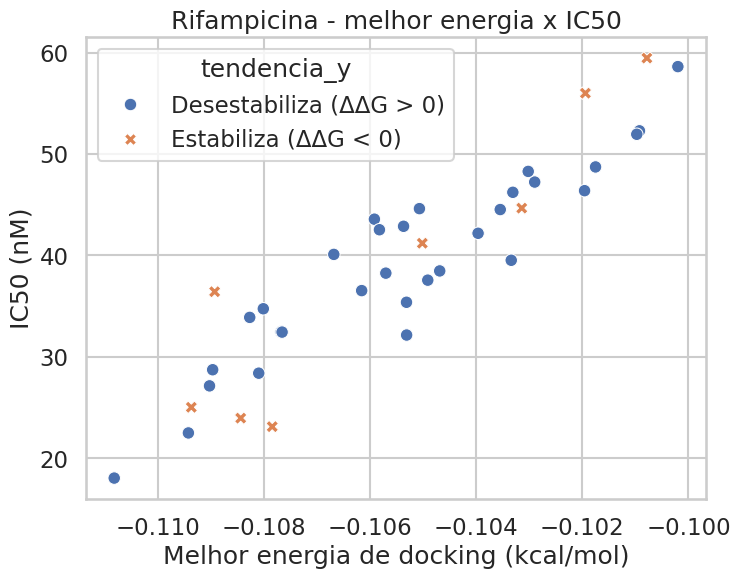

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=df_mut,
    x="media_le",
    y="media_ic50",
    hue="tendencia_y",
    style="tendencia_y"
)

ax.set_xlabel("Melhor energia de docking (kcal/mol)")
ax.set_ylabel("IC50 (nM)")
ax.set_title("Rifampicina - melhor energia x IC50")

ΔΔG (FoldX) × IC50

In [8]:
import numpy as np


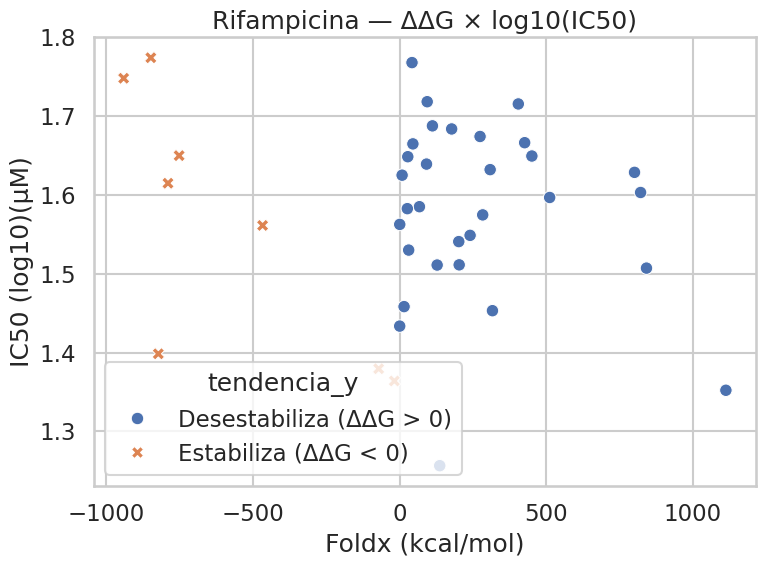

In [9]:
df_mut = df_mut.copy()
df_mut['log10_ic50'] = np.log10(df_mut['media_ic50'])

plt.figure(figsize=(8, 6))
ax = sns.scatterplot(
    data=df_mut,
    x="ddG_kcal",
    y="log10_ic50",
    hue="tendencia_y",
    style="tendencia_y"
)

ax.set_xlabel("Foldx (kcal/mol)")
ax.set_ylabel("IC50 (log10)(µM)")
ax.set_title("Rifampicina — ΔΔG × log10(IC50)")

plt.tight_layout()
plt.show()

BOXPLOT

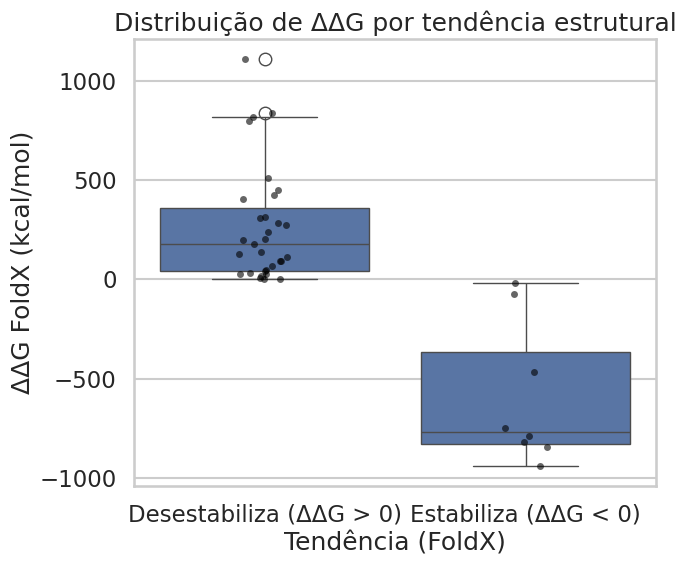

In [10]:
plt.figure(figsize=(7, 6))
ax = sns.boxplot(
    data=df_mut,
    x="tendencia_y",
    y="ddG_kcal"
)
sns.stripplot(
    data=df_mut,
    x="tendencia_y",
    y="ddG_kcal",
    color="black",
    alpha=0.6
)

ax.set_xlabel("Tendência (FoldX)")
ax.set_ylabel("ΔΔG FoldX (kcal/mol)")
ax.set_title("Distribuição de ΔΔG por tendência estrutural")

plt.tight_layout()
plt.show()


HEATMAP


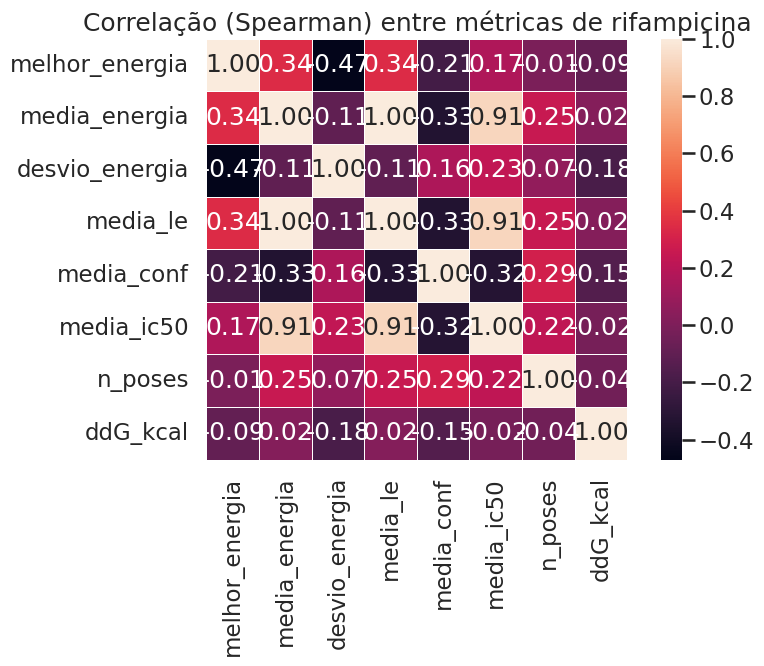

In [11]:
corr = df_mut[num_cols].corr(method="spearman")

plt.figure(figsize=(9, 7))
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5
)

ax.set_title("Correlação (Spearman) entre métricas de rifampicina")
plt.tight_layout()
plt.show()


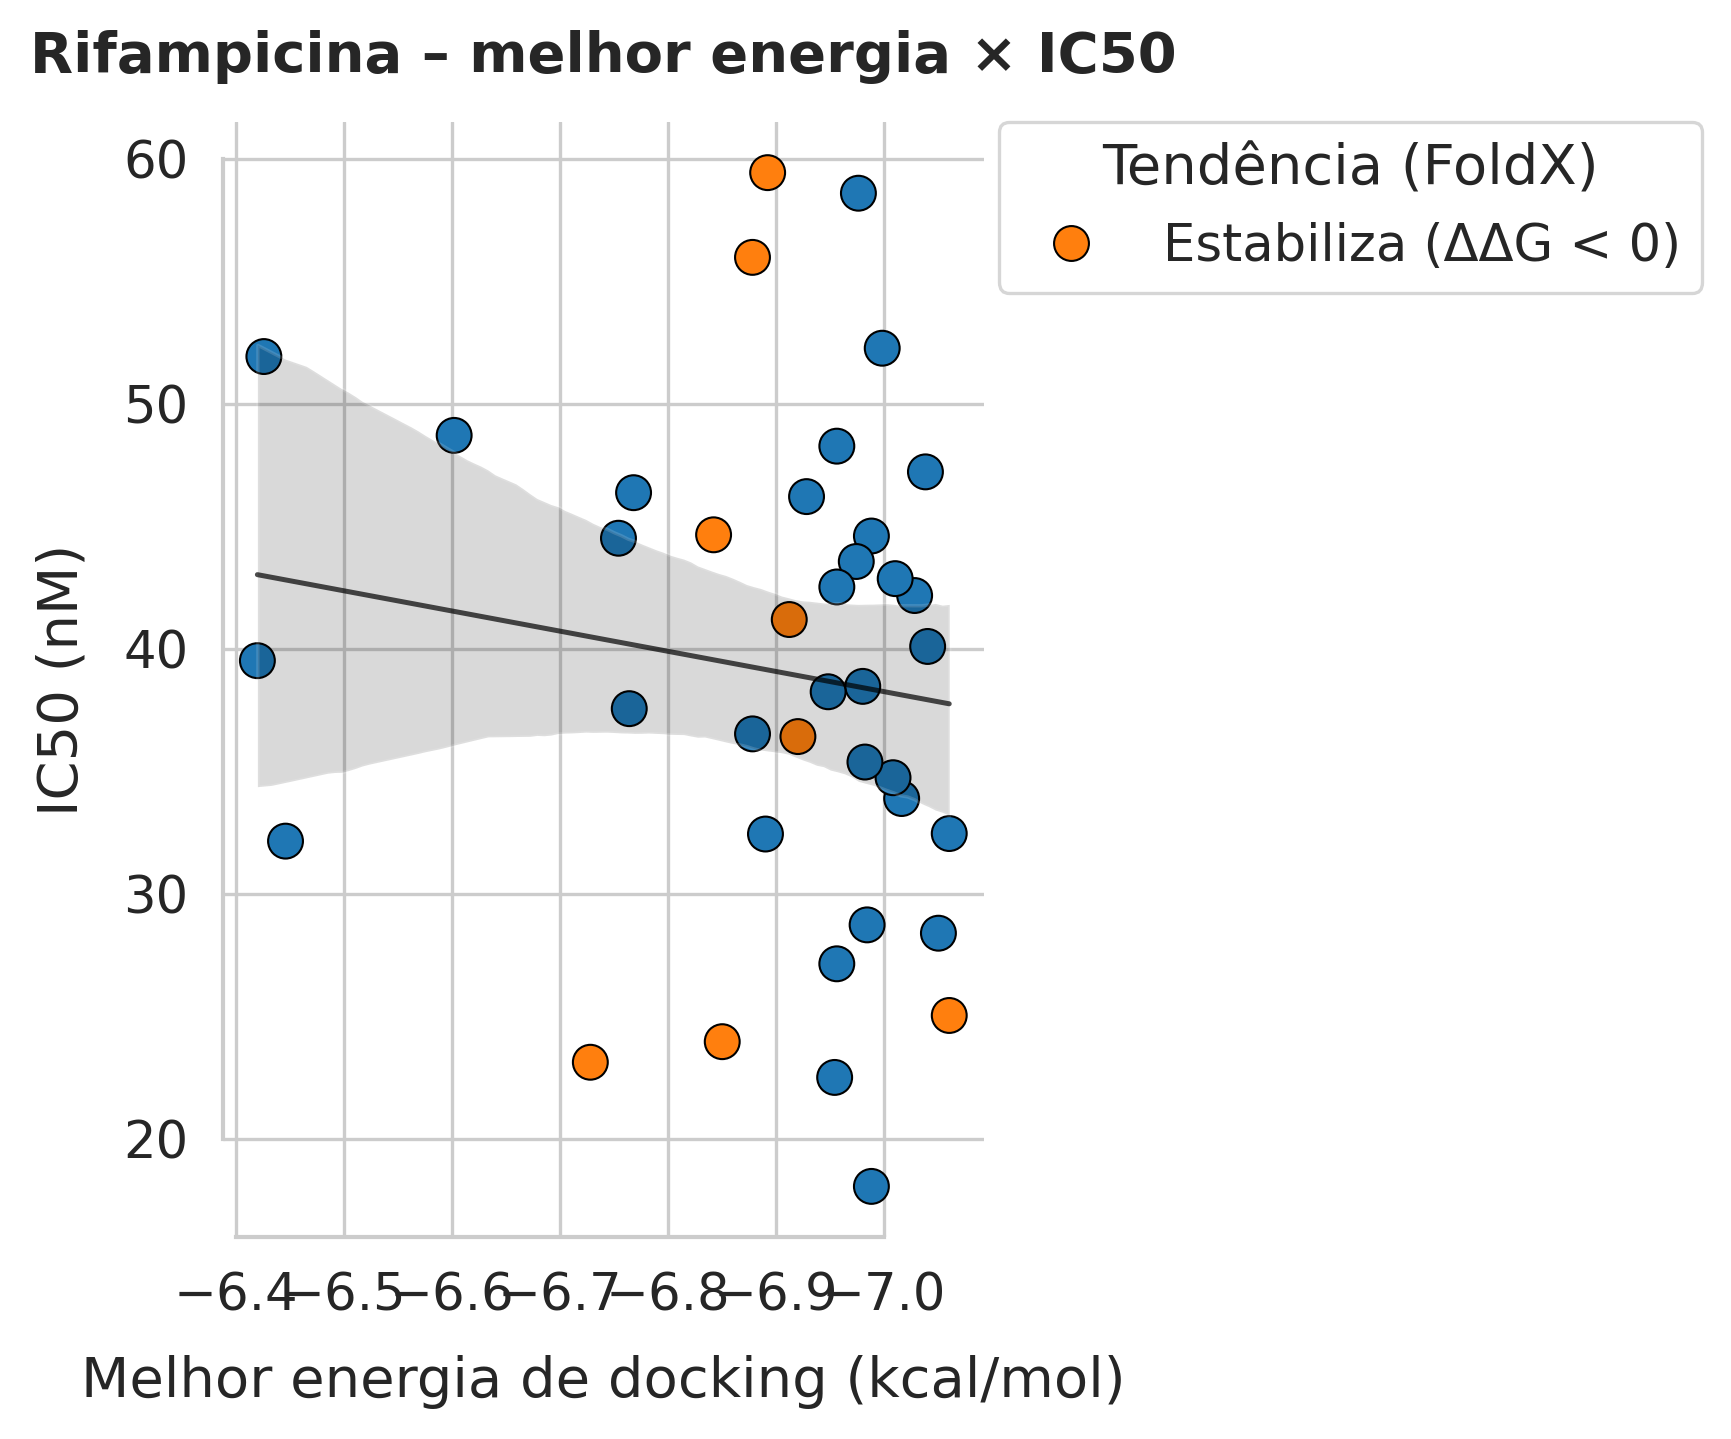

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1) Estilo geral da figura (modo "paper") ---
sns.set_theme(style="whitegrid", context="paper", font_scale=1.4)

# Se quiser excluir WT:
# df_plot = df[~df["mut_clean"].str.contains("WT", na=False)].copy()
df_plot = df_mut.copy()  # use o nome do seu data frame aqui

# --- 2) Figura base ---
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)

# Paleta fixa para garantir as mesmas cores sempre
palette = {
    "Desestabiliza (ΔΔG > 0)": "#1f77b4",  # azul
    "Estabiliza (ΔΔG < 0)"   : "#ff7f0e",  # laranja
}

# --- 3) Scatter principal ---
sns.scatterplot(
    data=df_plot,
    x="melhor_energia",
    y="media_ic50",
    hue="tendencia_y",
    palette=palette,
    s=70,                  # tamanho dos pontos
    edgecolor="black",     # contorno
    linewidth=0.5,
    ax=ax
)

# --- 4) Linha de tendência global (opcional, deixe se fizer sentido) ---
sns.regplot(
    data=df_plot,
    x="melhor_energia",
    y="media_ic50",
    scatter=False,
    color="black",
    ax=ax,
    line_kws={"linewidth": 1.2, "alpha": 0.7}
)

# --- 5) Ajustes finos de eixos e título ---
ax.invert_xaxis()  # energias mais negativas à direita

ax.set_xlabel("Melhor energia de docking (kcal/mol)", labelpad=8)
ax.set_ylabel("IC50 (nM)", labelpad=8)
ax.set_title("Rifampicina – melhor energia × IC50", pad=12, weight="bold")

# --- 6) Legenda para fora do gráfico ---
handles, labels = ax.get_legend_handles_labels()
# o primeiro item geralmente é o título automático do seaborn, então pulamos
ax.legend(
    handles=handles[1:],
    labels=labels[1:],
    title="Tendência (FoldX)",
    frameon=True,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0.
)

# --- 7) Limpar bordas e salvar em alta resolução ---
sns.despine(trim=True)
plt.tight_layout()

# Arquivo em alta qualidade para artigo
plt.savefig("rifampicina_melhor_energia_ic50_publicacao.png",
            dpi=600, bbox_inches="tight")

plt.show()


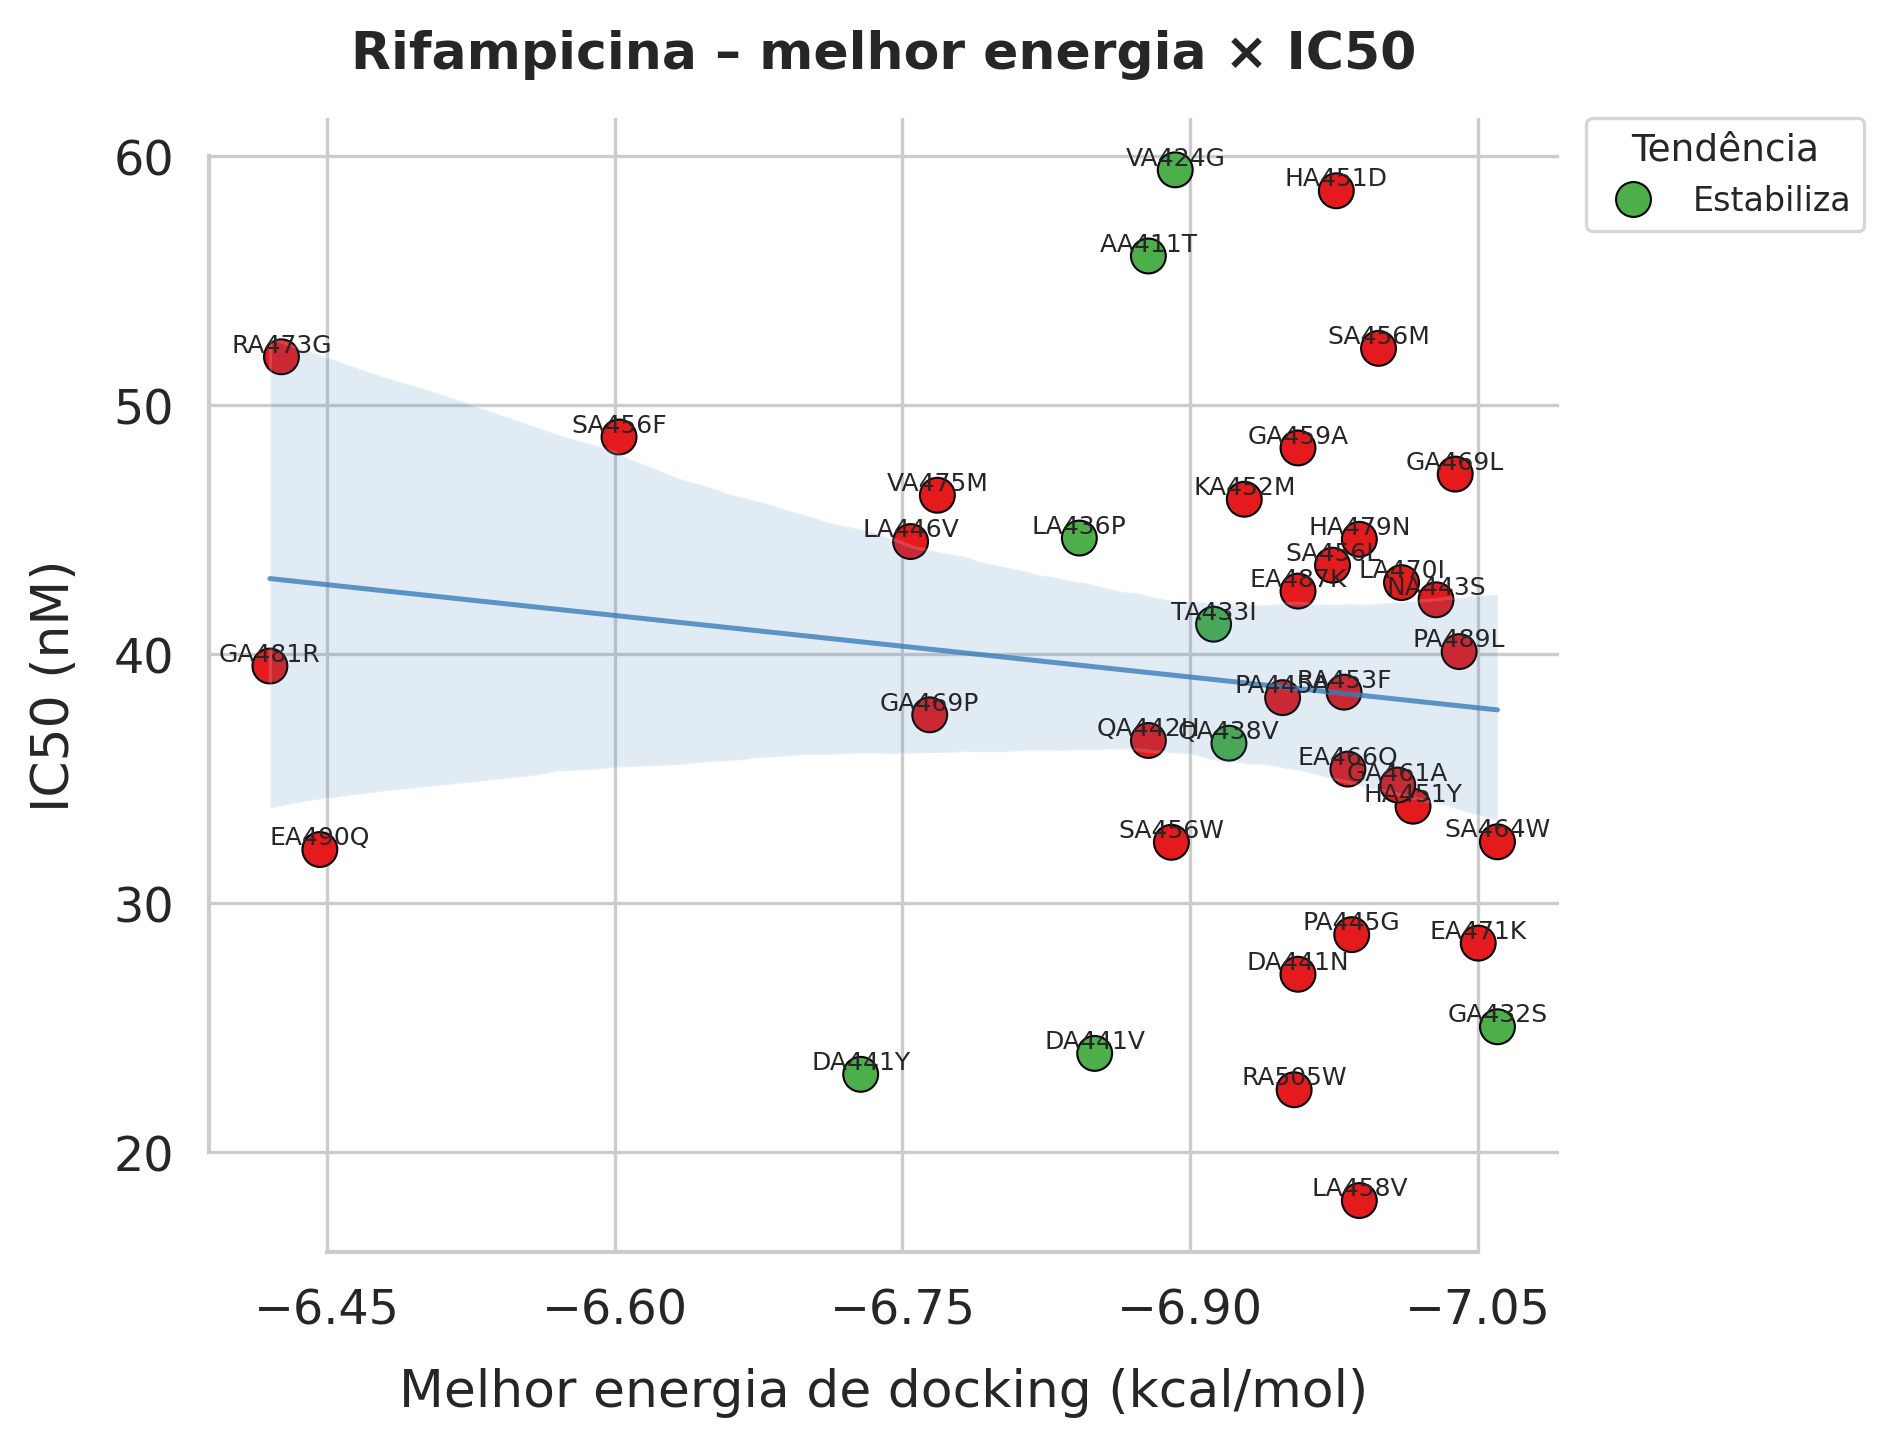

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# --- DataFrame que você já tem ---
# df_mut = df[~df["mut_clean"].str.contains("WT", na=False)].copy()
df_plot = df_mut.copy()

# Simplificar o texto da coluna de tendência para a legenda ficar menor
df_plot["tendencia_simp"] = df_plot["tendencia_y"].replace({
    "Desestabiliza (ΔΔG > 0)": "Desestabiliza",
    "Estabiliza (ΔΔG < 0)"    : "Estabiliza"
})

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3)

fig, ax = plt.subplots(figsize=(6.5, 5), dpi=300)

# Paleta personalizada
palette = {
    "Desestabiliza": "#e41a1c",  # vermelho
    "Estabiliza":   "#4daf4a",   # verde claro
}

# --- Scatter com cores novas ---
sns.scatterplot(
    data=df_plot,
    x="melhor_energia",
    y="media_ic50",
    hue="tendencia_simp",
    palette=palette,
    s=70,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)

# --- Linha de tendência em azul ---
sns.regplot(
    data=df_plot,
    x="melhor_energia",
    y="media_ic50",
    scatter=False,
    color="#377eb8",   # azul
    ax=ax,
    line_kws={"linewidth": 1.2, "alpha": 0.8}
)

# --- Eixo X menos "apertado" ---
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # máx. 5 labels no eixo X
ax.invert_xaxis()  # energias mais negativas à direita

# Rótulos e título
ax.set_xlabel("Melhor energia de docking (kcal/mol)", labelpad=8)
ax.set_ylabel("IC50 (nM)", labelpad=8)
ax.set_title("Rifampicina – melhor energia × IC50", pad=12, weight="bold")

# --- Anotar nomes das mutações ---
# (usa a coluna 'mut_clean'; ajuste se o nome da sua coluna for outro)
for _, row in df_plot.iterrows():
    ax.text(
        row["melhor_energia"],
        row["media_ic50"],
        row["mut_clean"],
        fontsize=6,
        ha="center",
        va="bottom",
        clip_on=True
    )

# --- Legenda menor e discreta, fora da área útil ---
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[1:],     # pula o rótulo automático "tendencia_simp"
    labels=labels[1:],
    title="Tendência",
    fontsize=8,
    title_fontsize=9,
    frameon=True,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0.
)

sns.despine(trim=True)
plt.tight_layout()

plt.savefig(
    "rifampicina_melhor_energia_ic50_pub_label_mutacoes.png",
    dpi=600,
    bbox_inches="tight"
)
plt.show()


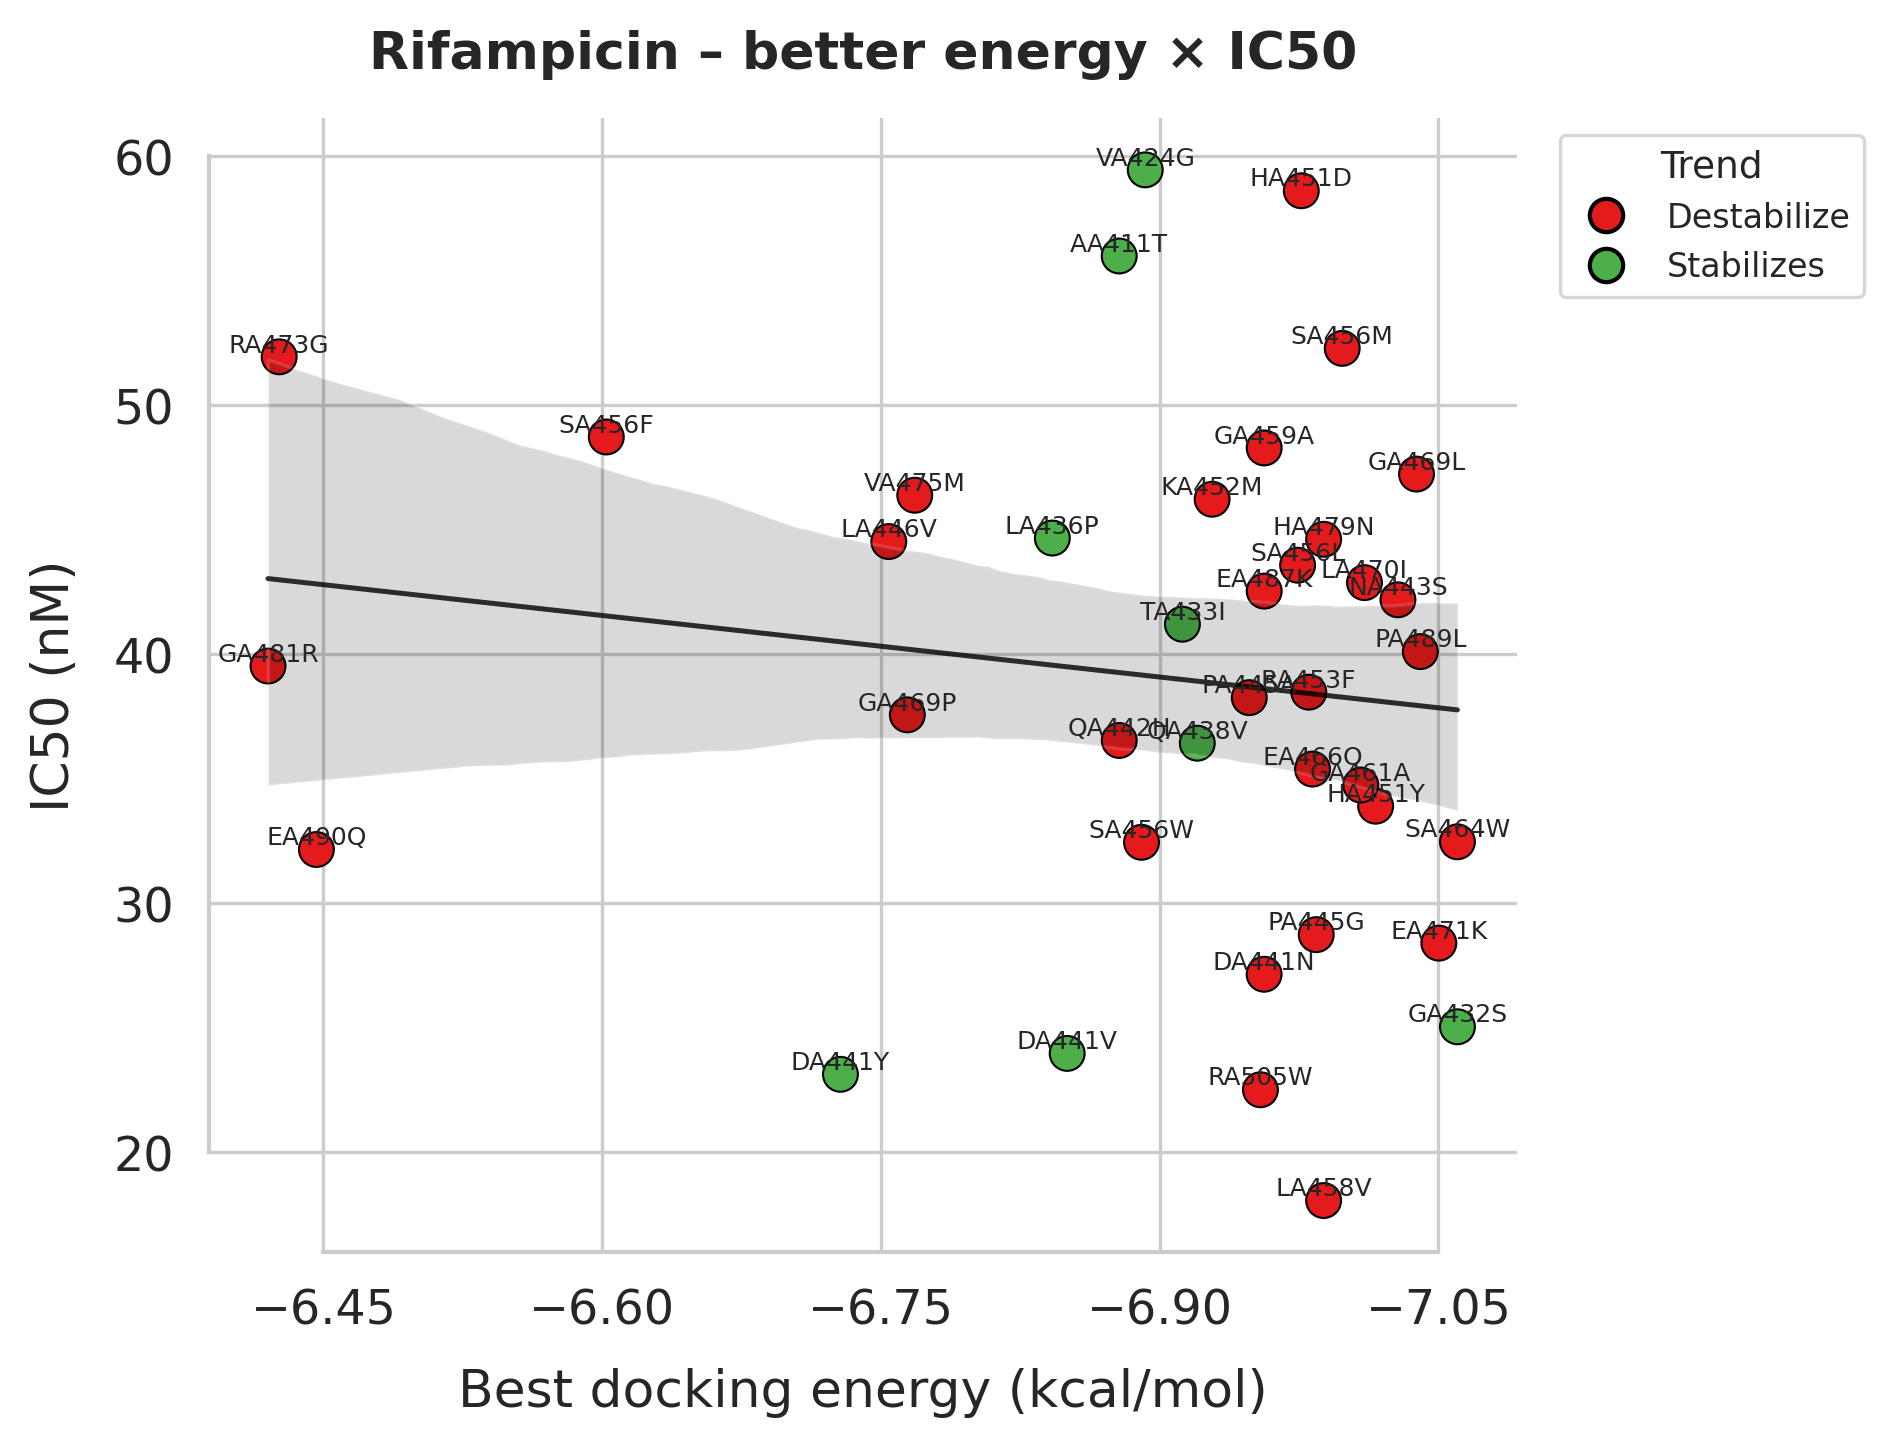

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

df_plot = df_mut.copy()

# Simplificar legenda
df_plot["tendencia_simp"] = df_plot["tendencia_y"].replace({
    "Desestabiliza (ΔΔG > 0)": "Destabilize",
    "Estabiliza (ΔΔG < 0)"    : "Stabilizes"
})

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3)

fig, ax = plt.subplots(figsize=(6.5, 5), dpi=300)

# Paleta
palette = {
    "Destabilize": "#e41a1c",  # vermelho
    "Stabilizes":   "#4daf4a",   # verde claro
}

# Scatter
sns.scatterplot(
    data=df_plot,
    x="melhor_energia",
    y="media_ic50",
    hue="tendencia_simp",
    palette=palette,
    s=70,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)

# Linha de tendência
sns.regplot(
    data=df_plot,
    x="melhor_energia",
    y="media_ic50",
    scatter=False,
    color="#000000",
    ax=ax,
    line_kws={"linewidth": 1.2, "alpha": 0.8}
)

# Eixo X mais limpo
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.invert_xaxis()

# Rótulos
ax.set_xlabel("Best docking energy (kcal/mol)", labelpad=8)
ax.set_ylabel("IC50 (nM)", labelpad=8)
ax.set_title("Rifampicin – better energy × IC50", pad=12, weight="bold")

# Nomes das mutações
for _, row in df_plot.iterrows():
    ax.text(
        row["melhor_energia"],
        row["media_ic50"],
        row["mut_clean"],
        fontsize=6,
        ha="center",
        va="bottom",
        clip_on=True
    )

# --- LEGENDA COMPLETA FORÇADA ---
# Queremos garantir as duas entradas, mesmo se uma categoria estiver ausente no dataframe filtrado
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=palette["Destabilize"],
           markeredgecolor="black",
           markersize=8, label="Destabilize"),
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=palette["Stabilizes"],
           markeredgecolor="black",
           markersize=8, label="Stabilizes"),
]

ax.legend(
    handles=legend_elements,
    title="Trend",
    fontsize=8,
    title_fontsize=9,
    frameon=True,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0)
)

sns.despine(trim=True)
plt.tight_layout()

plt.savefig(
    "rifampicina_melhor_energia_ic50_pub_legenda_corrigida.png",
    dpi=600,
    bbox_inches="tight"
)

plt.show()


In [24]:
from scipy.stats import spearmanr

rho, pval = spearmanr(df_plot["melhor_energia"], df_plot["media_ic50"])
print(rho, pval)


0.16680161943319838 0.31014543873614014


In [25]:
import statsmodels.api as sm

X = sm.add_constant(df_plot["melhor_energia"])
y = df_plot["media_ic50"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             media_ic50   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7102
Date:                Sat, 29 Nov 2025   Prob (F-statistic):              0.405
Time:                        01:47:42   Log-Likelihood:                -144.76
No. Observations:                  39   AIC:                             293.5
Df Residuals:                      37   BIC:                             296.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             95.9452     67.437      1.

In [17]:
plt.savefig(
    "rifampicina_melhor_energia_ic50_publicacao.png",
    dpi=600,                 # qualidade de artigo
    bbox_inches="tight",     # corta espaços em branco
    pad_inches=0.05,         # margem mínima
    facecolor="white"        # garante fundo branco
)


<Figure size 640x480 with 0 Axes>

In [18]:
from google.colab import files
files.download("rifampicina_melhor_energia_ic50_publicacao.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

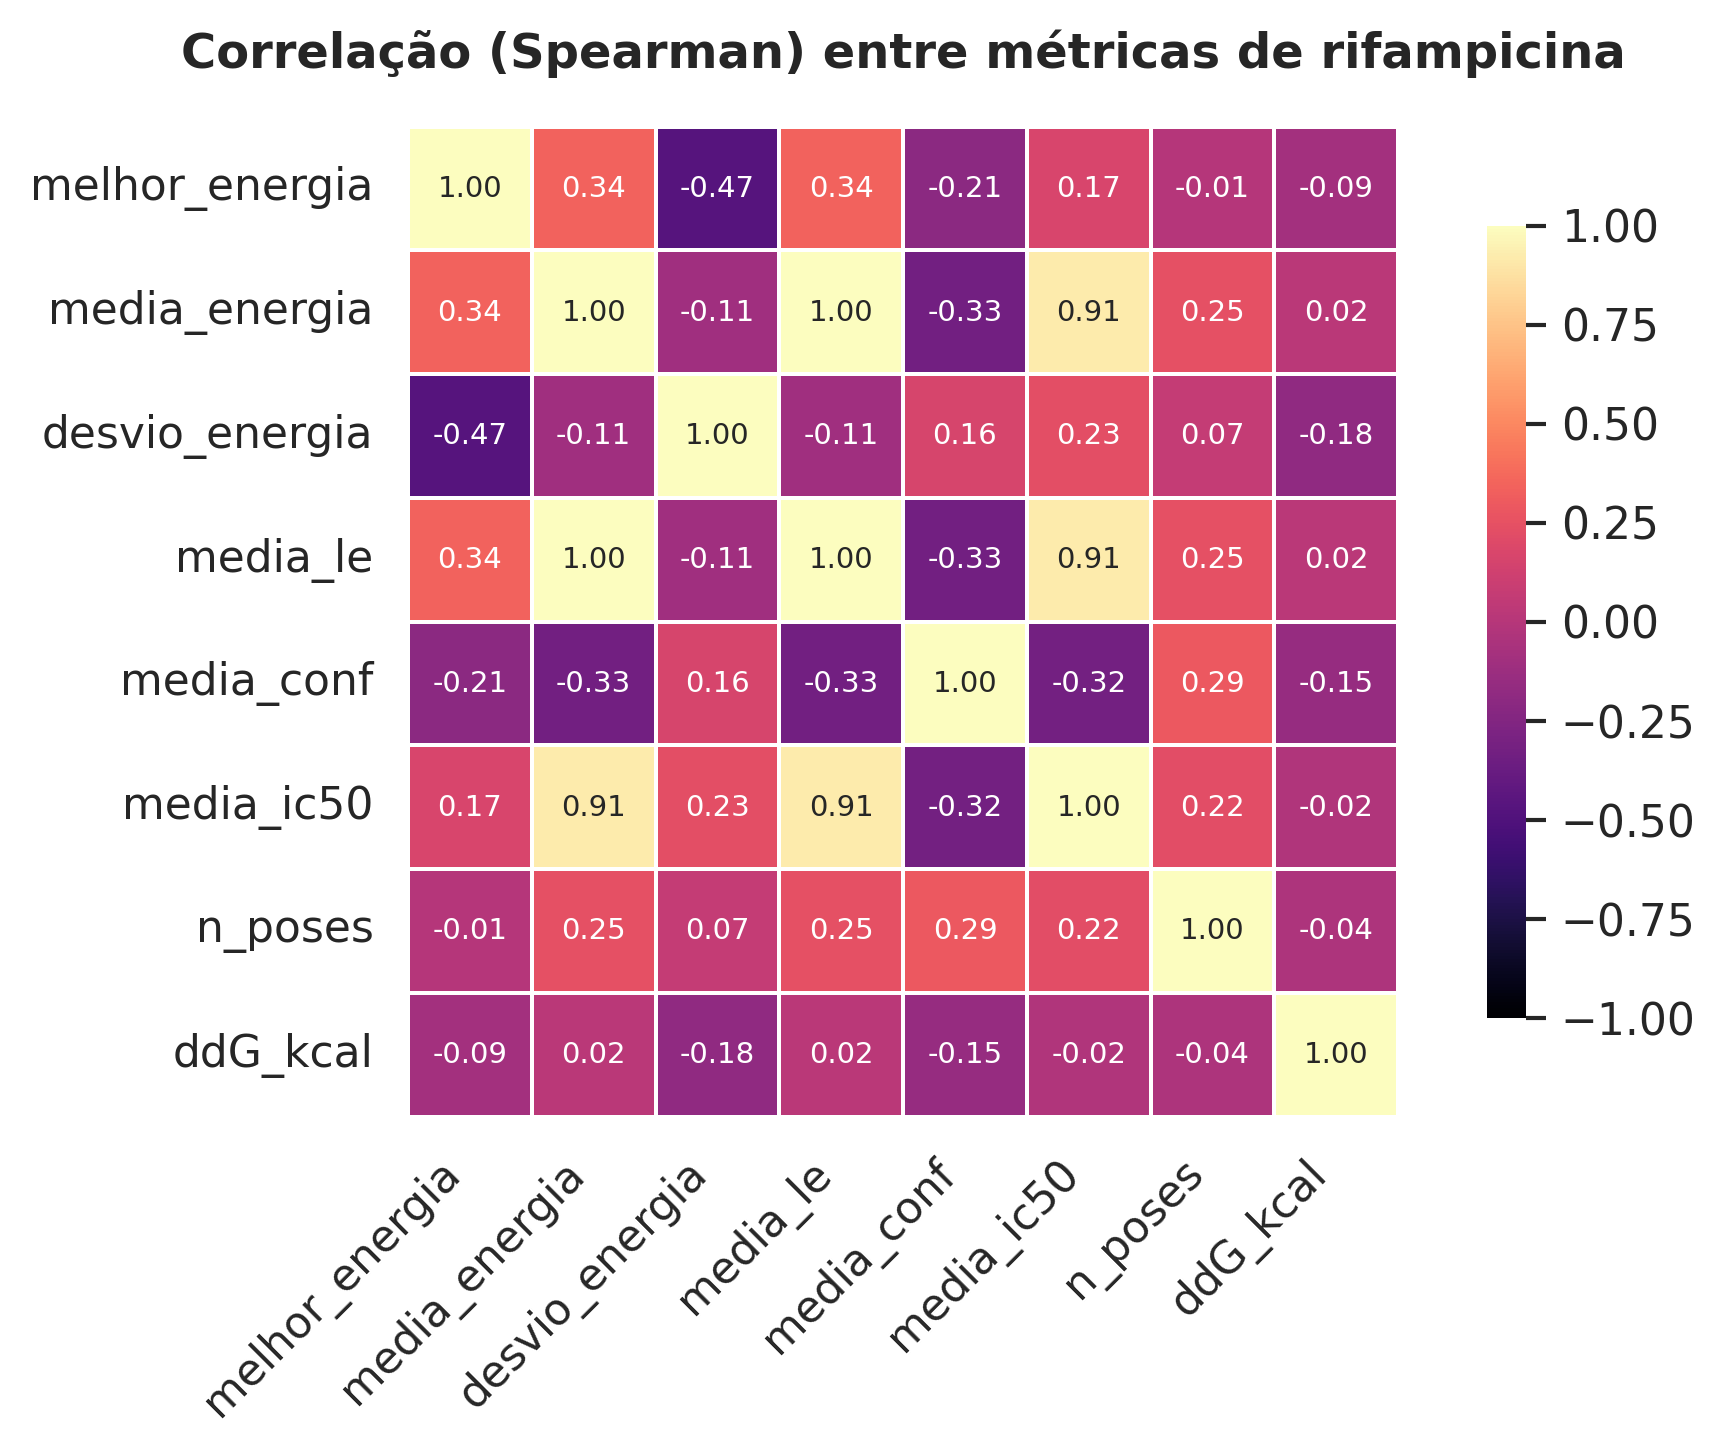

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1) Cálculo da correlação
# -------------------------
cols_corr = [
    "melhor_energia",
    "media_energia",
    "desvio_energia",
    "media_le",
    "media_conf",
    "media_ic50",
    "n_poses",
    "ddG_kcal"
]

corr = df_mut[cols_corr].corr(method="spearman")

# -------------------------
# 2) Estilo geral da figura
# -------------------------
sns.set_theme(style="white", context="paper", font_scale=1.2)

fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

# -------------------------
# 3) Heatmap com números
# -------------------------
hm = sns.heatmap(
    corr,
    annot=True,           # mostra os números
    fmt=".2f",
    annot_kws={"size": 7},  # tamanho dos números (menores)
    cmap="magma",         # paleta elegante (pode trocar pra "coolwarm", "viridis", etc.)
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8, "aspect": 20},  # barra de cor mais compacta
    linewidths=0.5,
    linecolor="white",
    ax=ax
)

# -------------------------
# 4) Ajustes de eixos e título
# -------------------------
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

ax.set_title("Correlação (Spearman) entre métricas de rifampicina",
             pad=14, weight="bold")

# Deixar bordas limpas
sns.despine(fig, left=True, bottom=True)

plt.tight_layout()

# -------------------------
# 5) Salvar em alta qualidade
# -------------------------
plt.savefig(
    "heatmap_correlacao_rifampicina.png",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0.05,
    facecolor="white"
)

plt.show()


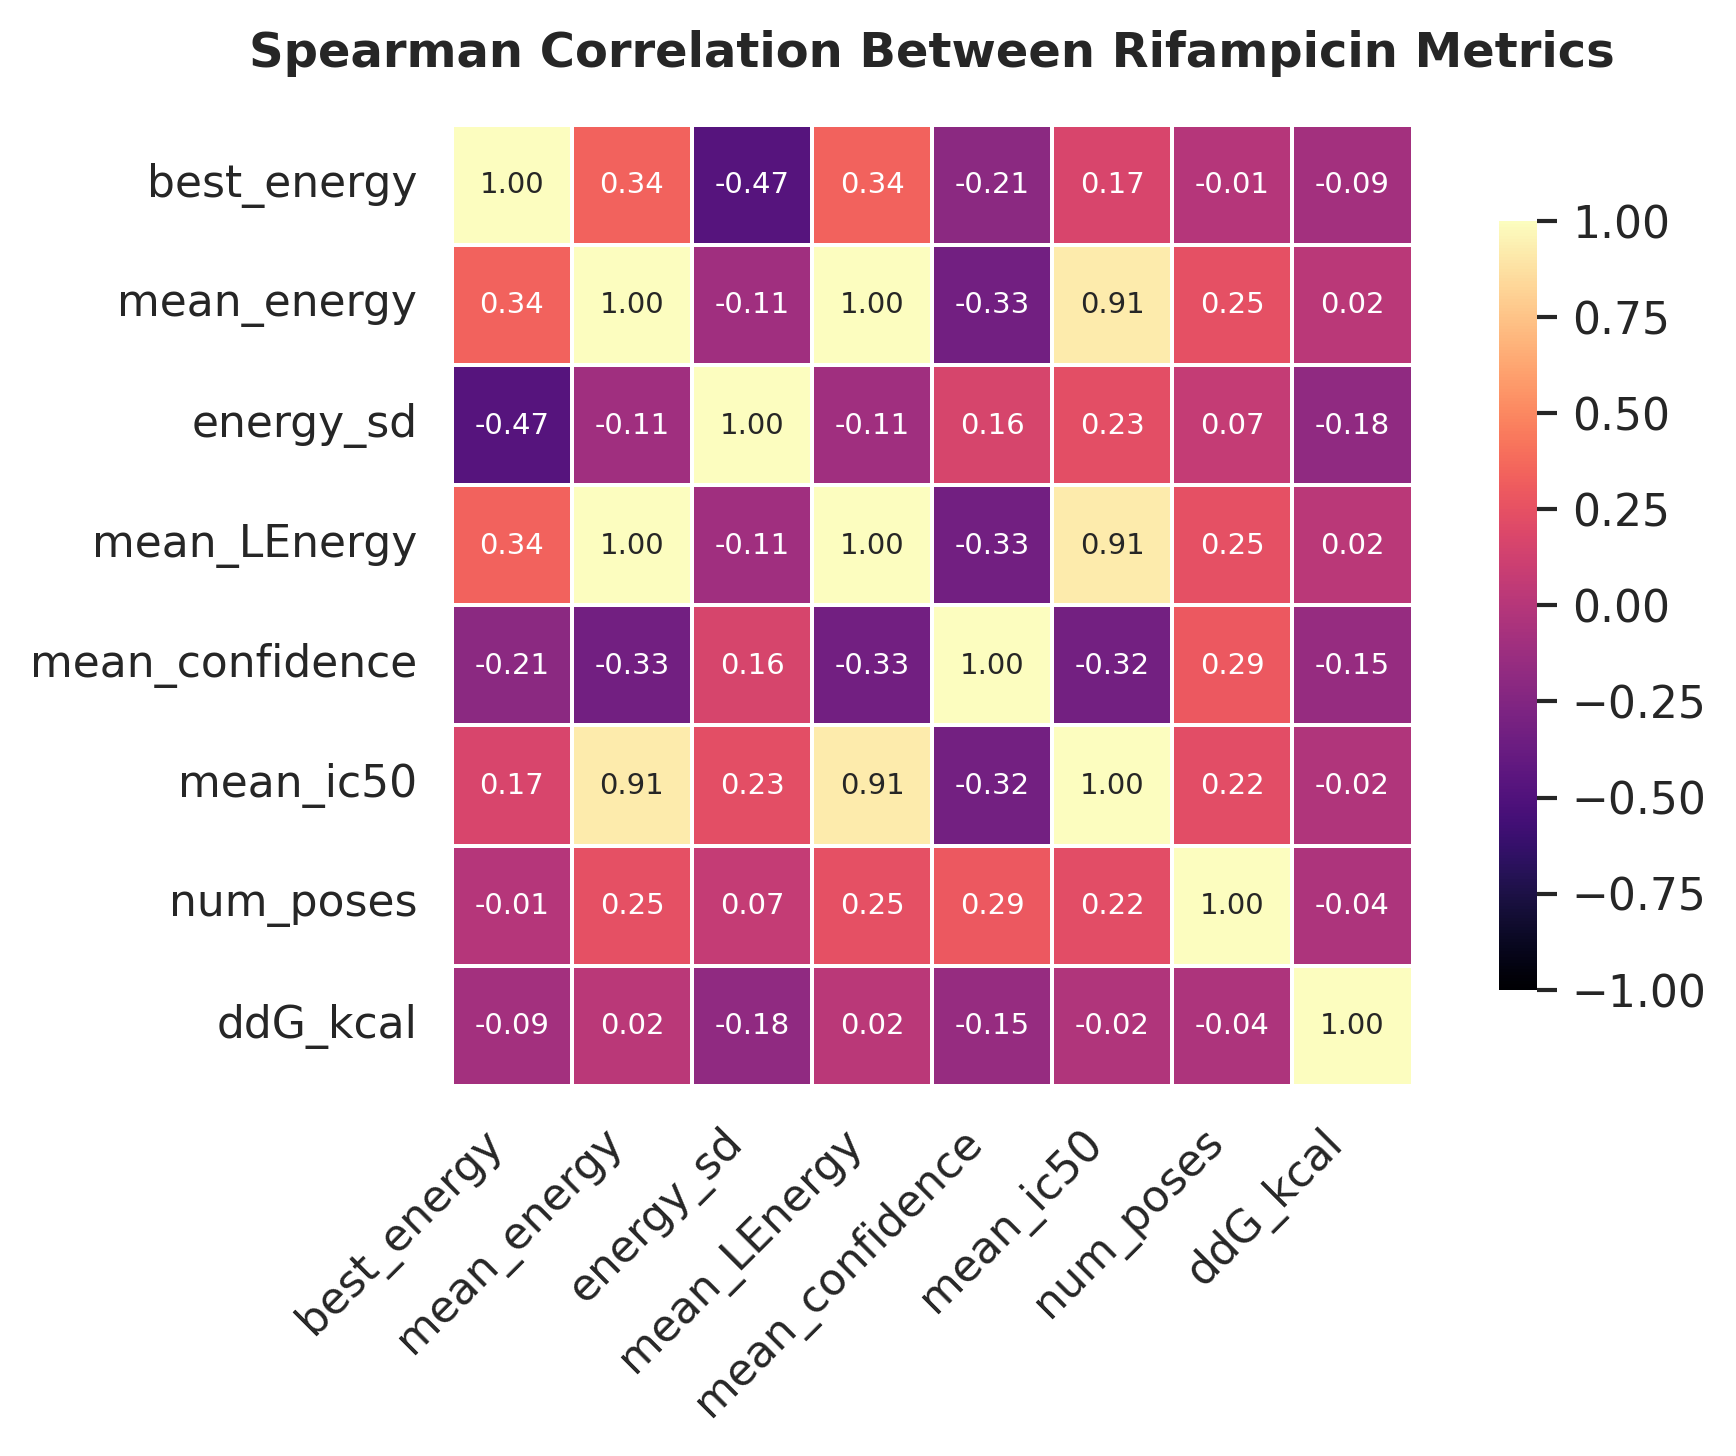

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário de tradução
rename_dict = {
    "melhor_energia": "best_energy",
    "media_energia": "mean_energy",
    "desvio_energia": "energy_sd",
    "media_le": "mean_LEnergy",
    "media_conf": "mean_confidence",
    "media_ic50": "mean_ic50",
    "n_poses": "num_poses",
    "ddG_kcal": "ddG_kcal"
}

# Criar cópia traduzida
df_eng = df_mut.rename(columns=rename_dict)

# Cálculo da correlação
cols_corr_eng = list(rename_dict.values())
corr = df_eng[cols_corr_eng].corr(method="spearman")

# Estilo
sns.set_theme(style="white", context="paper", font_scale=1.2)

fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

# Heatmap
hm = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 7},
    cmap="magma",
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "aspect": 20},
    ax=ax
)

# Ajustes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

ax.set_title(
    "Spearman Correlation Between Rifampicin Metrics",
    pad=14,
    weight="bold"
)

sns.despine(fig, left=True, bottom=True)
plt.tight_layout()

# Salvar PNG em alta qualidade
plt.savefig(
    "heatmap_rifampicin_correlation_english.png",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0.05,
    facecolor="white"
)

plt.show()


In [21]:
plt.savefig(
    "heatmap_rifampicin_correlation_english.png",
    dpi=600,                 # qualidade de publicação
    bbox_inches="tight",     # remove espaços extras
    pad_inches=0.05,
    facecolor="white"        # fundo branco
)


<Figure size 640x480 with 0 Axes>

In [23]:
from google.colab import files
files.download("heatmap_rifampicin_correlation_english.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import pandas as pd
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

cols = cols_corr_eng
pairs = [(i, j) for i in cols for j in cols if i < j]

pvals = []
rvals = []

for a, b in pairs:
    r, p = spearmanr(df_eng[a], df_eng[b])
    rvals.append(r)
    pvals.append(p)

# Correção FDR
reject, pvals_corr, _, _ = multipletests(pvals, method="fdr_bh")

results = pd.DataFrame({
    "var1": [a for a,b in pairs],
    "var2": [b for a,b in pairs],
    "rho": rvals,
    "p_corrected": pvals_corr,
    "significant": reject
})

print(results)


               var1             var2       rho   p_corrected  significant
0       best_energy      mean_energy  0.341498  1.337049e-01        False
1       best_energy        energy_sd -0.469838  1.782147e-02         True
2       best_energy     mean_LEnergy  0.341498  1.337049e-01        False
3       best_energy  mean_confidence -0.207160  3.840252e-01        False
4       best_energy        mean_ic50  0.166802  5.108278e-01        False
5       best_energy        num_poses -0.007205  9.652769e-01        False
6       best_energy         ddG_kcal -0.093522  7.269796e-01        False
7       mean_energy        mean_ic50  0.914575  3.751810e-15         True
8       mean_energy        num_poses  0.248094  2.981879e-01        False
9         energy_sd      mean_energy -0.106275  6.928337e-01        False
10        energy_sd     mean_LEnergy -0.106275  6.928337e-01        False
11        energy_sd  mean_confidence  0.158093  5.233449e-01        False
12        energy_sd        mean_ic50  

PCA


In [28]:
cols_pca = [
    "melhor_energia",
    "media_energia",
    "desvio_energia",
    "media_le",
    "media_conf",
    "media_ic50",
    "n_poses",
    "ddG_kcal"
]

df_pca = df_mut[cols_pca].copy()


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)


In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_mut["PC1"] = X_pca[:, 0]
df_mut["PC2"] = X_pca[:, 1]


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Se ainda não tiver df_mut definido, certifique-se de criá-lo antes:
# df_mut = df[~df["mut_clean"].str.contains("WT", na=False)].copy()

# Colunas numéricas para o PCA
cols_pca = [
    "melhor_energia",
    "media_energia",
    "desvio_energia",
    "media_le",
    "media_conf",
    "media_ic50",
    "n_poses",
    "ddG_kcal"
]

# Garantir que não tenha NA nessas colunas
df_pca = df_mut[cols_pca].dropna().copy()

# Se quiser manter só as linhas usadas no PCA em df_mut:
df_mut_pca = df_mut.loc[df_pca.index].copy()

# Padronizar (z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)


In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_mut_pca["PC1"] = X_pca[:, 0]
df_mut_pca["PC2"] = X_pca[:, 1]


In [36]:
df_mut_pca["tendencia_simp"] = df_mut_pca["tendencia_y"].replace({
    "Desestabiliza (ΔΔG > 0)": "Desestabiliza",
    "Estabiliza (ΔΔG < 0)"    : "Estabiliza"
})


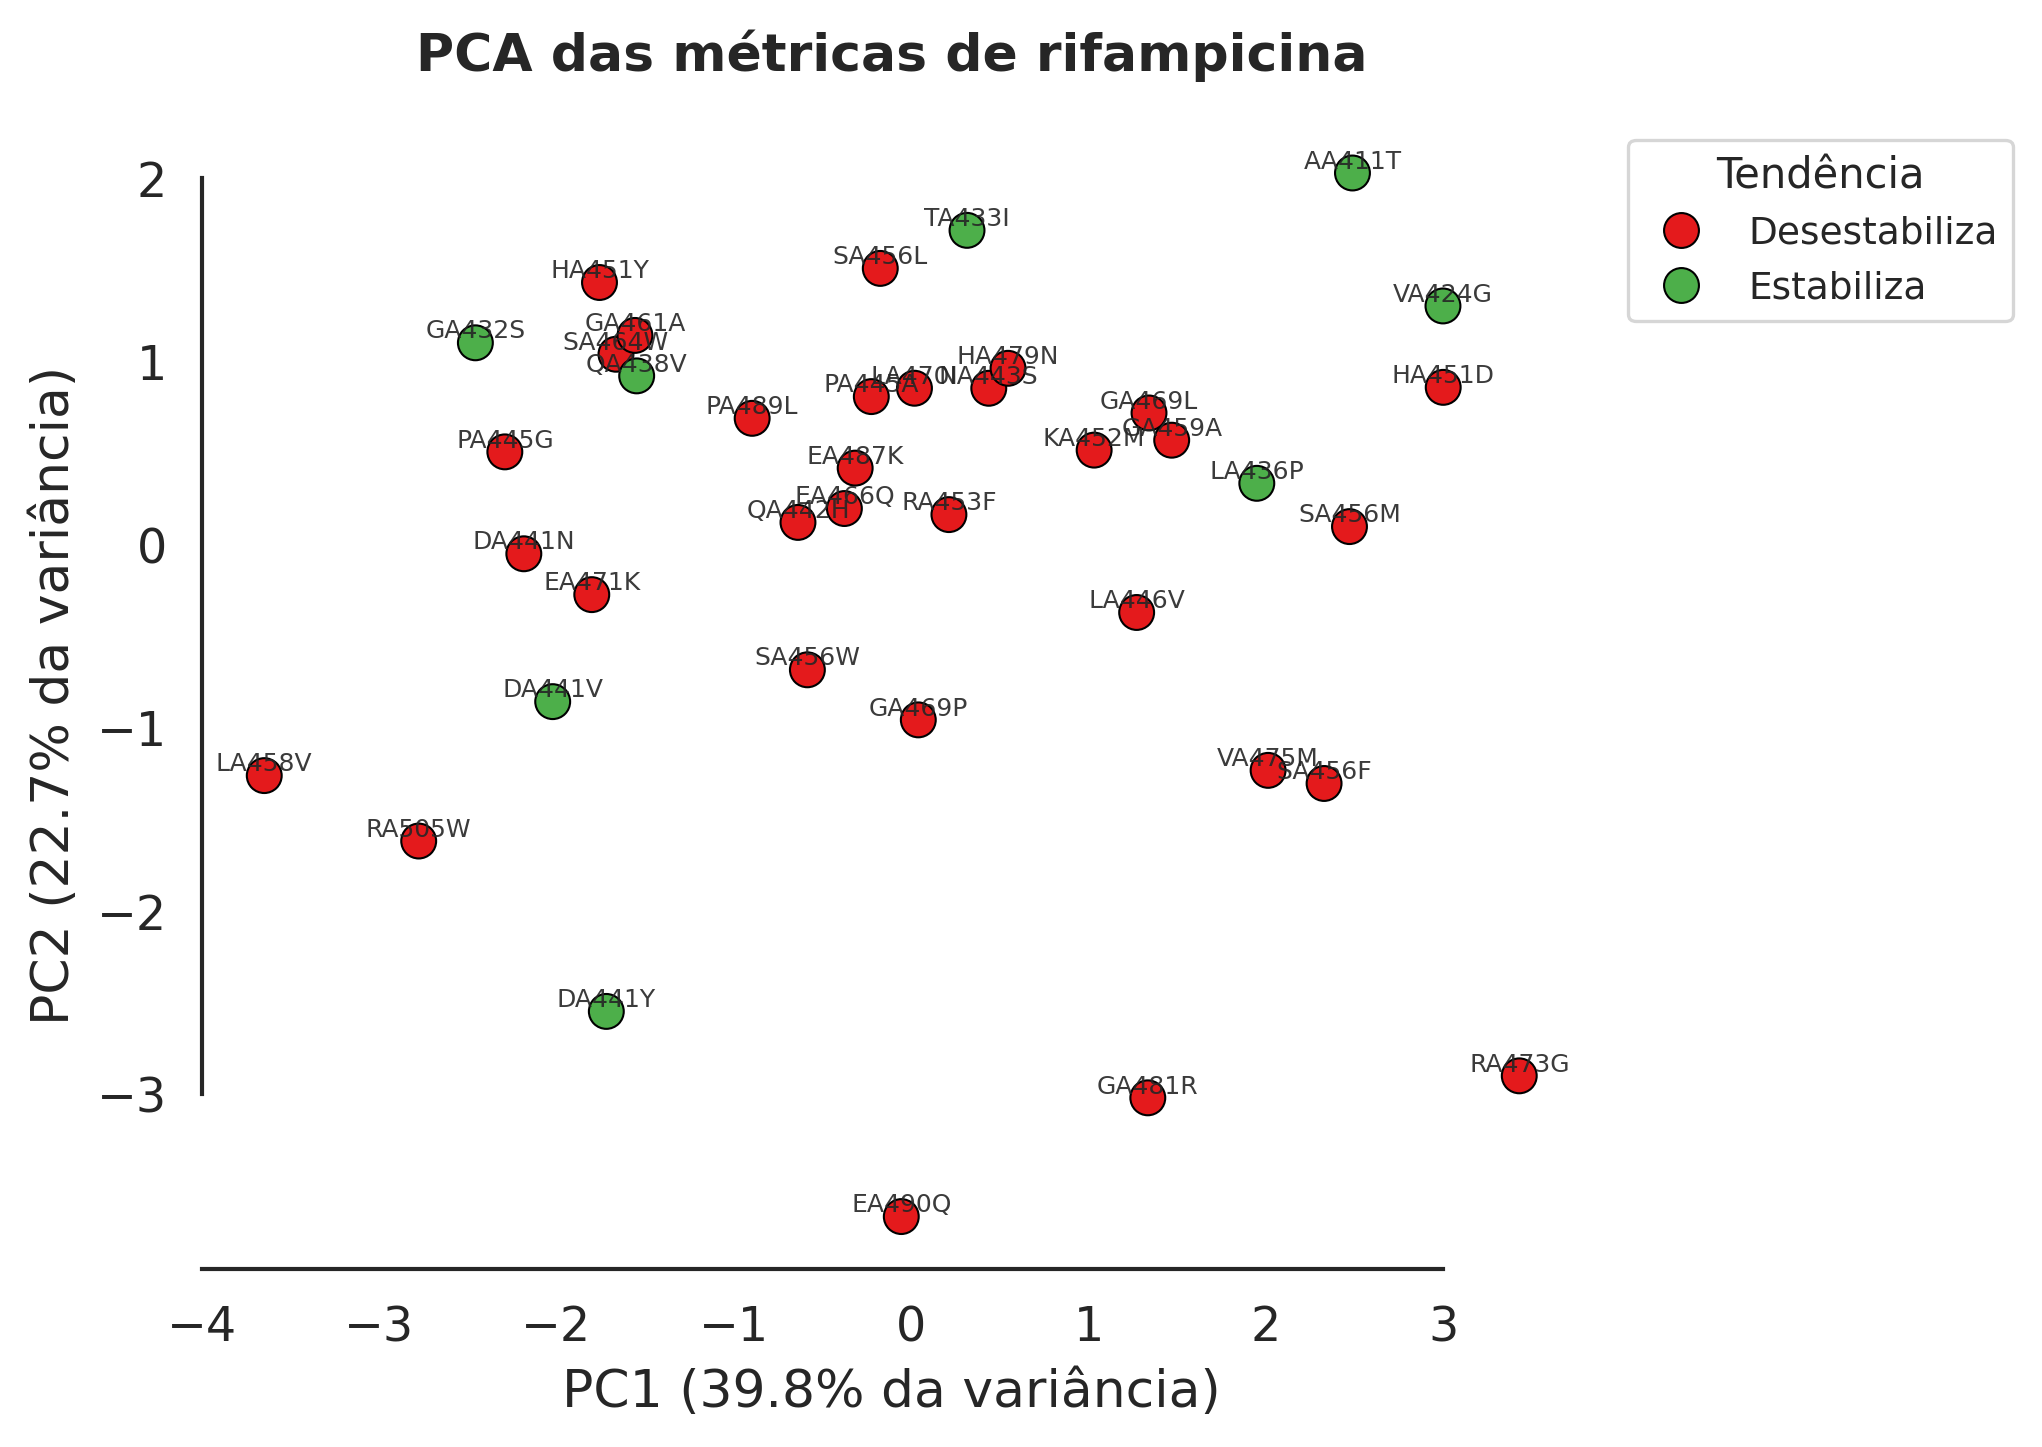

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", context="paper", font_scale=1.3)

palette = {
    "Estabiliza": "#4daf4a",    # verde
    "Desestabiliza": "#e41a1c"  # vermelho
}

fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

sns.scatterplot(
    data=df_mut_pca,
    x="PC1",
    y="PC2",
    hue="tendencia_simp",
    palette=palette,
    s=70,
    edgecolor="black",
    linewidth=0.5,
    ax=ax
)

# Nomes das mutações
for _, row in df_mut_pca.iterrows():
    ax.text(
        row["PC1"],
        row["PC2"],
        row["mut_clean"],
        fontsize=6,
        ha="center",
        va="bottom",
        alpha=0.9
    )

# Variância explicada
var1 = pca.explained_variance_ratio_[0] * 100
var2 = pca.explained_variance_ratio_[1] * 100

ax.set_xlabel(f"PC1 ({var1:.1f}% da variância)")
ax.set_ylabel(f"PC2 ({var2:.1f}% da variância)")
ax.set_title("PCA das métricas de rifampicina", weight="bold", pad=12)

# Legenda fora
ax.legend(
    title="Tendência",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=9,
    title_fontsize=10
)

sns.despine(trim=True)
plt.tight_layout()

plt.savefig(
    "PCA_rifampicina.png",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0.05,
    facecolor="white"
)

plt.show()
